In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('/Users/CourtneyTaylor/Downloads/churn_clean.csv')

In [4]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [5]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job',
        'Marital', 'Gender', 'Churn',
        'Email', 'Contacts', 
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [9]:
df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,1,1.670972,149.948316,271.493436


In [10]:
df.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

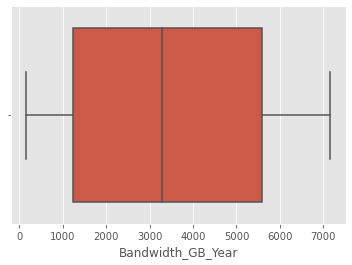

In [11]:
sns.boxplot('Bandwidth_GB_Year', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

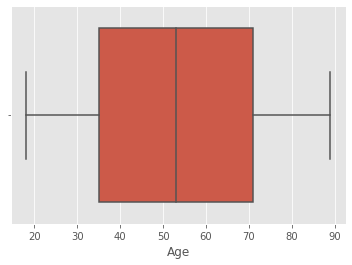

In [12]:
sns.boxplot('Age', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

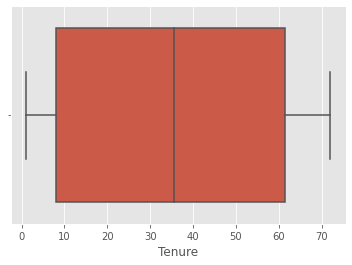

In [13]:
sns.boxplot('Tenure', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

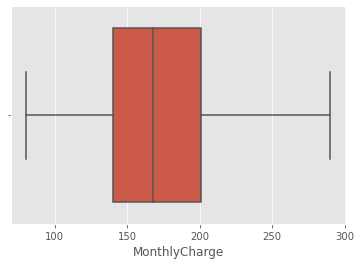

In [14]:
sns.boxplot('MonthlyCharge', data = df)

In [15]:
df.to_csv('D212Task2.csv')

In [16]:
df = pd.read_csv('D212Task2.csv')

In [17]:
df = df.drop(columns=['Unnamed: 0'])

In [18]:
#Scaling data to avoid dominance
scaler = StandardScaler()

#Mean & std
scaler.fit(df)
d_scaled = scaler.transform(df)

In [19]:
#Apply PCA to explain 100% variance
pca_9 = PCA(n_components=9)
pca_9.fit(d_scaled)
pc = pca_9.transform(d_scaled)
print(pc)

[[-1.54341667 -0.73808053  1.00464836 ...  0.01183477 -0.38664247
  -0.02741151]
 [-1.65545496 -0.34631085 -1.54685781 ...  0.19254679 -1.73126074
  -0.03929885]
 [-0.91745069  0.5600758  -0.3690249  ...  0.53176668  0.20701812
   0.06015675]
 ...
 [ 0.56899935  0.18935792  0.72843057 ... -0.0285666  -0.37402655
  -0.08772523]
 [ 2.01795035 -1.47070763 -1.76277937 ...  0.51999806 -1.2365076
  -0.06958081]
 [ 1.58699908 -0.51917733 -1.63318148 ... -0.10208727 -0.95290996
  -0.03423982]]


In [20]:
pc_df = pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3' ,'PC4', 
                                  'PC5', 'PC6', 'PC7', 'PC8',
                                  'PC9'])
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.543417 -0.738081  1.004648  0.845836  0.227888 -0.989074  0.011835   
1    -1.655455 -0.346311 -1.546858  0.679083  0.499660 -0.370050  0.192547   
2    -0.917451  0.560076 -0.369025 -0.016230  1.084847 -1.124273  0.531767   
3    -0.925791 -0.354424 -0.837400 -1.143586  0.460865 -0.379396 -1.533369   
4    -1.907428 -1.062163  1.625070  0.512162  0.663450 -0.252758 -0.098475   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.893468  1.489617 -0.364413 -0.231430 -0.938723 -0.006242 -0.458083   
9996  1.453659 -0.879628  0.069211 -3.019407  0.799304  2.891294  2.063552   
9997  0.568999  0.189358  0.728431  0.038348 -1.301272 -0.348316 -0.028567   
9998  2.017950 -1.470708 -1.762779 -0.944236 -0.030529  0.891432  0.519998   
9999  1.586999 -0.519177 -1.633181 -0.606680 -0.506807 -0.487032 -0.102087   

           PC8       PC9  
0    -0.386642 -0.027412  
1    -1.7

In [21]:
#Load into dataframe
Load = pd.DataFrame(pca_9.components_.T,
                    columns=['PC1', 'PC2', 'PC3' ,'PC4', 
                                  'PC5', 'PC6', 'PC7', 'PC8',
                                  'PC9'],
                    index=df.columns)
Load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Population,-0.005648,-0.276915,0.034972,-0.590085,0.360911,0.605521,0.140596,-0.239128,-0.000346
Children,0.014357,0.600471,-0.213902,-0.080223,0.197833,0.116769,0.599427,0.417717,-0.021567
Age,0.001611,-0.561312,0.389730,0.238096,0.125560,0.071567,0.239097,0.630708,0.022356
Income,0.004214,0.319552,0.244733,0.441076,-0.166468,0.733881,-0.276894,0.021514,-0.000942
Outage_sec_perweek,0.005879,-0.133707,-0.676154,0.098398,0.365076,0.112417,-0.488549,0.361418,0.000269
Yearly_equip_failure,0.017285,0.108758,0.217818,0.419104,0.783008,-0.168371,0.041815,-0.348685,-0.000095
Tenure,0.705566,-0.005760,0.040055,-0.031699,0.000002,-0.012117,-0.039050,0.021464,-0.705267
MonthlyCharge,0.040499,-0.340226,-0.484677,0.455689,-0.201553,0.186725,0.495091,-0.342552,-0.045759
Bandwidth_GB_Year,0.707067,0.008659,-0.009635,-0.011789,-0.011062,0.002507,0.003707,-0.008236,0.706781


In [22]:
print(Load)

                           PC1       PC2       PC3       PC4       PC5  \
Population           -0.005648 -0.276915  0.034972 -0.590085  0.360911   
Children              0.014357  0.600471 -0.213902 -0.080223  0.197833   
Age                   0.001611 -0.561312  0.389730  0.238096  0.125560   
Income                0.004214  0.319552  0.244733  0.441076 -0.166468   
Outage_sec_perweek    0.005879 -0.133707 -0.676154  0.098398  0.365076   
Yearly_equip_failure  0.017285  0.108758  0.217818  0.419104  0.783008   
Tenure                0.705566 -0.005760  0.040055 -0.031699  0.000002   
MonthlyCharge         0.040499 -0.340226 -0.484677  0.455689 -0.201553   
Bandwidth_GB_Year     0.707067  0.008659 -0.009635 -0.011789 -0.011062   

                           PC6       PC7       PC8       PC9  
Population            0.605521  0.140596 -0.239128 -0.000346  
Children              0.116769  0.599427  0.417717 -0.021567  
Age                   0.071567  0.239097  0.630708  0.022356  
Income 

In [23]:
print('Variance explained by the components=', sum(pca_9.explained_variance_ratio_ * 100))

Variance explained by the components= 100.00000000000001


In [24]:
pca_9.explained_variance_ratio_ * 100

array([22.15242508, 11.58509911, 11.35795688, 11.18996104, 11.14486833,
       11.00542773, 10.8172401 , 10.68626647,  0.06075526])

In [25]:
#Variance per PC
varex1 = pca_9.explained_variance_ratio_ * 100
var_df1 = pd.DataFrame(varex1.round(2), columns=['Captured Variance per PC'],
                       index=['PC1', 'PC2', 'PC3' ,'PC4', 
                                  'PC5', 'PC6', 'PC7', 'PC8',
                                  'PC9'])
var_df1

,Captured Variance per PC
PC1,22.15
PC2,11.59
PC3,11.36
PC4,11.19
PC5,11.14
PC6,11.01
PC7,10.82
PC8,10.69
PC9,0.06


In [26]:
#Eigenvalues
eigenvalues = pca_9.explained_variance_ratio_
eigen_df = pd.DataFrame(eigenvalues.round(4), columns=['Eigenvalues per PC'], 
                        index=['PC1', 'PC2', 'PC3' ,'PC4', 
                                  'PC5', 'PC6', 'PC7', 'PC8',
                                  'PC9'])
eigen_df

,Eigenvalues per PC
PC1,0.2215
PC2,0.1159
PC3,0.1136
PC4,0.1119
PC5,0.1114
PC6,0.1101
PC7,0.1082
PC8,0.1069
PC9,0.0006


In [27]:
#explanation of cumulative sum of array
np.cumsum(pca_9.explained_variance_ratio_ * 100)

array([ 22.15242508,  33.73752419,  45.09548107,  56.28544212,
        67.43031044,  78.43573817,  89.25297827,  99.93924474,
       100.        ])

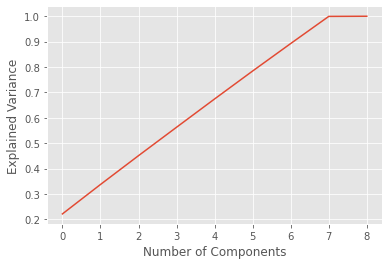

In [28]:
#Scree Plot
plt.plot(np.cumsum(pca_9.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [29]:
#Scree Plot above shows 7 components capture majority of the variance

In [30]:
print('Variance explained by the first principal component =',
      np.cumsum(pca_9.explained_variance_ratio_ * 100)[0])
print('Variance explained by the first 2 principal component =',
      np.cumsum(pca_9.explained_variance_ratio_ * 100)[1])
print('Variance explained by the first 3 principal component =',
      np.cumsum(pca_9.explained_variance_ratio_ * 100)[2])
print('Variance explained by the first 7 principal component =',
      np.cumsum(pca_9.explained_variance_ratio_ * 100)[6])

Variance explained by the first principal component = 22.152425082239493
Variance explained by the first 2 principal component = 33.73752418843068
Variance explained by the first 3 principal component = 45.09548107182724
Variance explained by the first 7 principal component = 89.25297826826991


In [31]:
#The first 7 PCs explain 89.25% of the variance

In [32]:
#Use 7 components
pc7 = PCA(n_components=7)
pc7.fit(d_scaled)
var_pca7 = pc7.transform(d_scaled)

In [33]:
#Variance for the 7 PCs
pca_7 = pc7.explained_variance_ratio_ * 100
var_df1 = pd.DataFrame(pca_7.round(2), columns=['Captured Variance per PC'],
                       index = ['PC1', 'PC2', 'PC3' ,'PC4', 
                                  'PC5', 'PC6', 'PC7'])
var_df1                         

,Captured Variance per PC
PC1,22.15
PC2,11.59
PC3,11.36
PC4,11.19
PC5,11.14
PC6,11.01
PC7,10.82


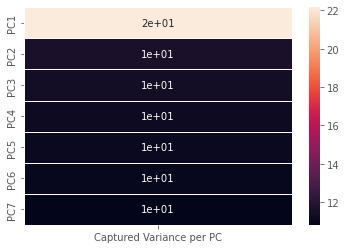

In [34]:
#heatmap
sns.heatmap(var_df1, annot=True, linewidth=1, fmt='.1g')
plt.show()

In [35]:
#The first component accounts for 22% of the variance
#The first two components account for 33% of the variance
#All 7 components 89% of the variance

In [36]:
#First two components
pca2 = PCA(n_components=2)
pca2.fit(d_scaled)
trans_pca2 = pca2.transform(d_scaled)

PC2 = pd.DataFrame(data = trans_pca2, columns=['PC1', 'PC2'])
PC2

,PC1,PC2
0,-1.543417,-0.738081
1,-1.655455,-0.346311
2,-0.917451,0.560076
3,-0.925791,-0.354424
4,-1.907428,-1.062163
...,...,...
9995,1.893468,1.489617
9996,1.453659,-0.879628
9997,0.568999,0.189358
9998,2.017950,-1.470708


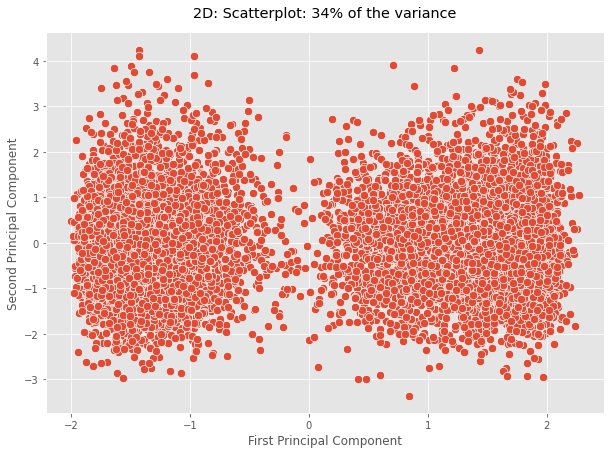

In [37]:
#2-dimensional scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(x=trans_pca2[:, 0], y=trans_pca2[:, 1], s=70)
plt.title('2D: Scatterplot: 34% of the variance', pad=15)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('2D_scatterplot.png')

In [38]:
#Below, you can see 3 components captured 48.36% of the variance
pca3 = PCA(n_components=3)
pca3.fit(d_scaled)
trans_pca3 = pca3.transform(d_scaled)

var = pca3.explained_variance_ratio_ * 100
var_df = pd.DataFrame(var.round(2), columns=['Explained Variance'],
                       index = ['PC1', 'PC2', 'PC3'])
var_df

,Explained Variance
PC1,22.15
PC2,11.59
PC3,11.36


In [39]:
from mpl_toolkits import mplot3d

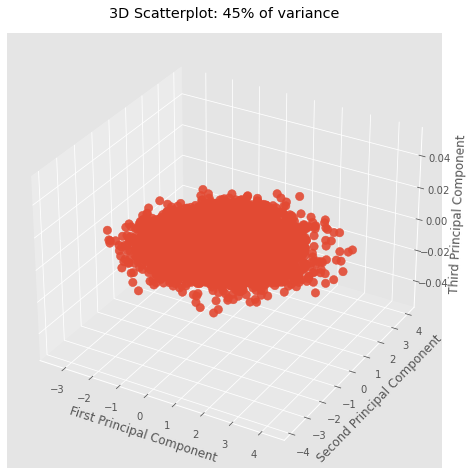

In [40]:
#Plotting the 3D Scatterplot for 45% variance
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')

scatt = ax.scatter3D(trans_pca3[:, 1], trans_pca3[:, 2],
                     s=70, alpha=0.90)

plt.title('3D Scatterplot: 45% of variance', pad=15)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.savefig('3D_scatterplot.png')